**1. Introduction**

https://4cs.gia.edu/en-us/blog/gia-diamond-cut-grade-six-things-to-know/

GIA is one of the most authoritative organization. The explanation for diamond cut grades are here.

**2. Preliminary exploratory data analysis**

In [11]:
library(tidyverse)
library(ggplot2)
library(repr)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



In [49]:
diamond_data <- read_csv("diamonds.csv") |> mutate(cut = as_factor(cut))
head(diamond_data)

Rows: 53940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): cut, color, clarity
dbl (7): carat, depth, table, price, x, y, z

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [50]:
na_rows <- sum(apply(is.na(diamond_data), 1, any))
na_rows
summary(diamond_data)

[1] 0

     carat               cut           color             clarity         
 Min.   :0.2000   Ideal    :21551   Length:53940       Length:53940      
 1st Qu.:0.4000   Premium  :13791   Class :character   Class :character  
 Median :0.7000   Good     : 4906   Mode  :character   Mode  :character  
 Mean   :0.7979   Very Good:12082                                        
 3rd Qu.:1.0400   Fair     : 1610                                        
 Max.   :5.0100                                                          
     depth           table           price             x         
 Min.   :43.00   Min.   :43.00   Min.   :  326   Min.   : 0.000  
 1st Qu.:61.00   1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710  
 Median :61.80   Median :57.00   Median : 2401   Median : 5.700  
 Mean   :61.75   Mean   :57.46   Mean   : 3933   Mean   : 5.731  
 3rd Qu.:62.50   3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.: 6.540  
 Max.   :79.00   Max.   :95.00   Max.   :18823   Max.   :10.740  
       y            

The 'na_rows' counts for the number of rows containing missing data, and the result of 0 meaning we do not have any missing data in this dataset. Additionally, the dbl factors are correctly showing the minimum and maximum values, so we know they do not contain any missing information, otherwise they will output NA.

`summarise()` has grouped output by 'color'. You can override using the
`.groups` argument.


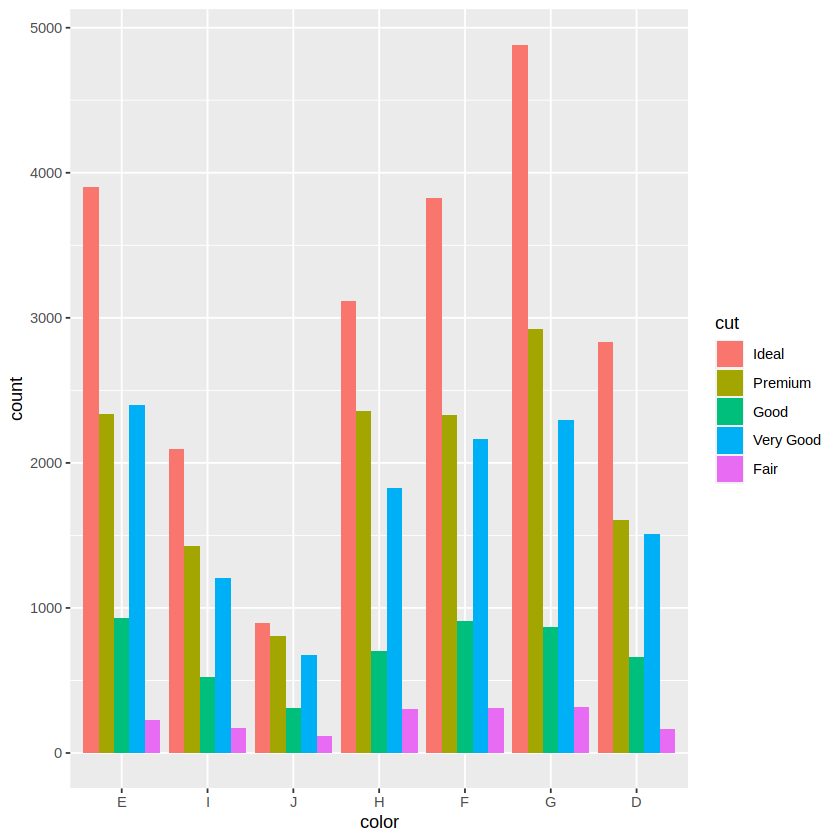

In [51]:
price_graph <- diamond_data |>
mutate(color = as_factor(color)) |>
group_by(color,cut) |>
summarize(count = n()) |>
ggplot(aes(x=color, y=count,fill=cut)) +
geom_bar(stat="identity", position="dodge")

price_graph

IDK what I am doing here, just showing some random graphs?